In [1]:
#1) Delivery_time -> Predict delivery time using sorting time
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\admin\\Downloads\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df['Delivery Time'].value_counts()

Delivery Time
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

<Axes: >

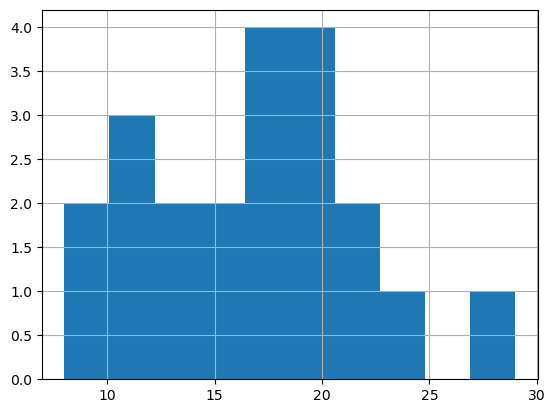

In [5]:
df['Delivery Time'].hist()

In [6]:
df.head()
x=df['Sorting Time']
y=df['Delivery Time']

In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


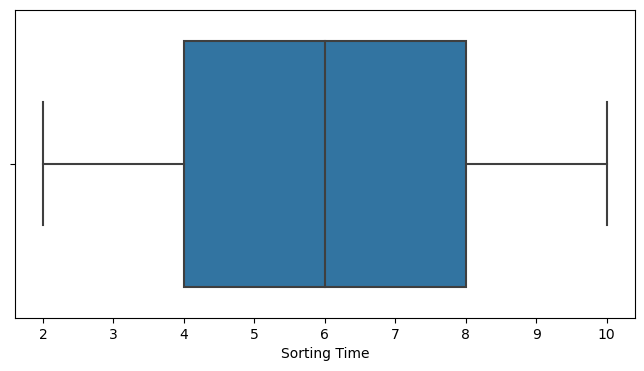

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x= df['Sorting Time'], data=df)
plt.show()

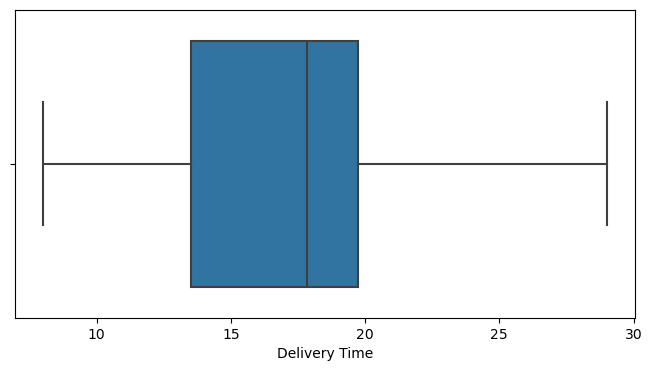

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x= df['Delivery Time'], data=df)
plt.show()

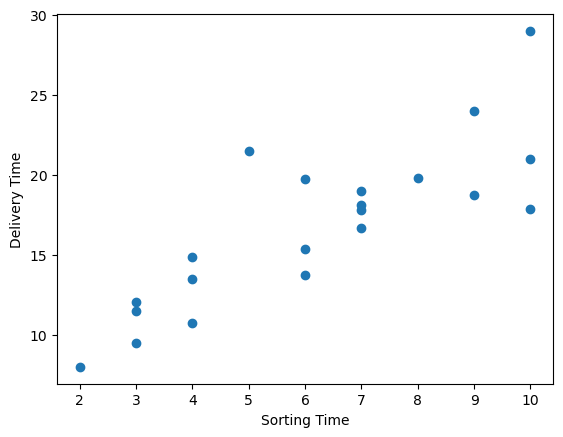

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['Sorting Time'],df['Delivery Time'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

plt.show()

In [11]:
x=df['Sorting Time']
y=df['Delivery Time']

In [12]:
#Cross validation
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
training_error=[]
testing_error = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=i)
    x_train = x_train.values.reshape(-1, 1)  # Reshape x_train
    x_test = x_test.values.reshape(-1, 1)    # Reshape x_test
    LR.fit(x_train,y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    testing_error.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    
print("Cross validation training error:", np.mean(training_error).round(2))
print("Cross validation testing error:", np.mean(testing_error).round(2))

Cross validation training error: 2.73
Cross validation testing error: 2.99


In [13]:
# Predict delivery time for a new sorting time
new_sorting_time = [[20]]  # Example sorting time
predicted_delivery_time = LR.predict(new_sorting_time)
print('Predicted Delivery Time:', predicted_delivery_time)


Predicted Delivery Time: [38.86216254]


In [18]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

X_train_transformed = np.log(x_train)
X_test_transformed = np.log(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for log transformation:", rmse_transformed)

RMSE for log transformation: 3.046946276454742


In [19]:
X_train_transformed = np.square(x_train)
X_test_transformed = np.square(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for square transformation:", rmse_transformed)

RMSE for square transformation: 3.8457657196089503


In [20]:
X_train_transformed = np.sqrt(x_train)
X_test_transformed = np.sqrt(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for sqrt transformation:", rmse_transformed)

RMSE for sqrt transformation: 3.101605117588347


In [23]:
# 2) Salary_hike -> Build a prediction model for Salary_hike
df1=pd.read_csv("C:\\Users\\admin\\Downloads\\Salary_Data.csv")
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [25]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

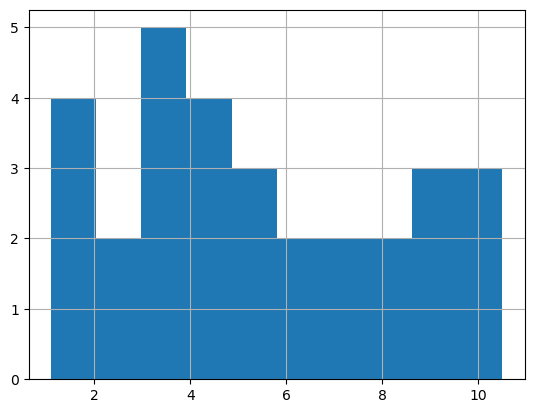

In [26]:
df1['YearsExperience'].hist()

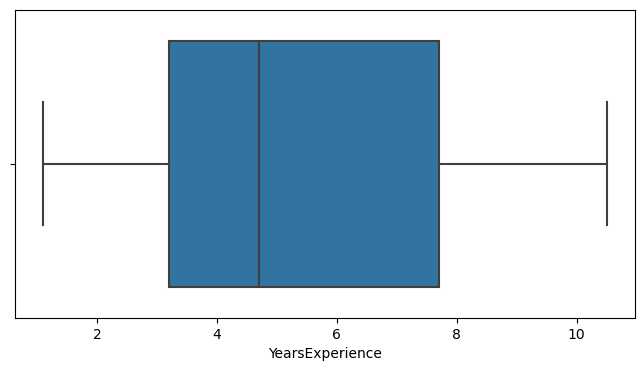

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x= df1['YearsExperience'], data=df1)
plt.show()

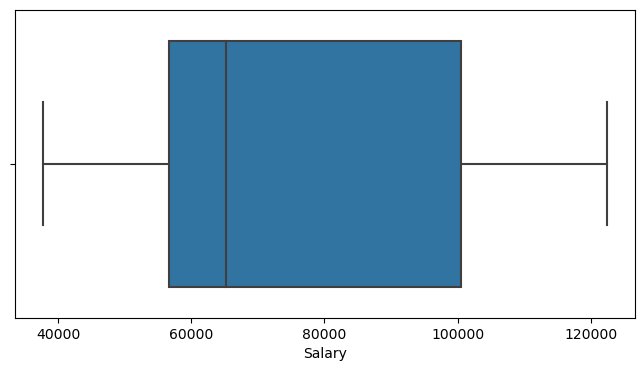

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df1['Salary'], data=df1)
plt.show()

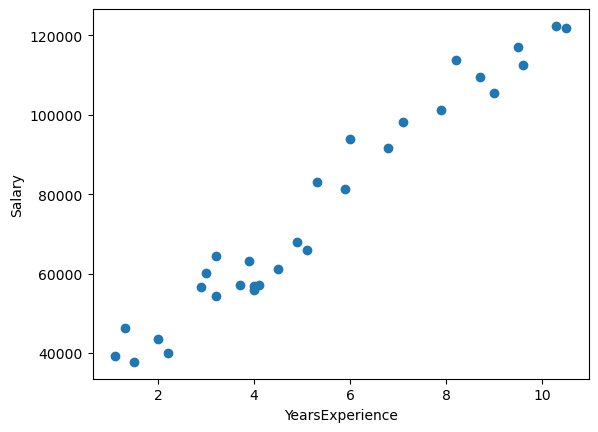

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df1['YearsExperience'],df1['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.show()

In [31]:
x=df1['YearsExperience']
y=df1['Salary']

In [32]:
#Cross validation
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
training_error=[]
testing_error = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=i)
    x_train = x_train.values.reshape(-1, 1)  # Reshape x_train
    x_test = x_test.values.reshape(-1, 1)    # Reshape x_test
    LR.fit(x_train,y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    testing_error.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    
print("Cross validation training error:", np.mean(training_error).round(2))
print("Cross validation testing error:", np.mean(testing_error).round(2))

Cross validation training error: 5600.25
Cross validation testing error: 5579.96


In [33]:
# Predict salary hike for a new years of experience
new_years_experience = [[10]]  # Example salary hike
predicted_salary_hike = LR.predict(new_years_experience)
print('Predicted salary hike :', predicted_salary_hike)


Predicted salary hike : [120430.22902192]


In [37]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

X_train_transformed = np.log(x_train)
X_test_transformed = np.log(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for log transformation:", rmse_transformed)

RMSE for log transformation: 12796.929082107663


In [38]:
X_train_transformed = np.square(x_train)
X_test_transformed = np.square(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for square transformation:", rmse_transformed)

RMSE for square transformation: 5076.949151978899


In [39]:
X_train_transformed = np.sqrt(x_train)
X_test_transformed = np.sqrt(x_test)
# Train a new model with transformed features
regressor_transformed = LinearRegression()
regressor_transformed.fit(X_train_transformed, y_train)
# Make predictions on the testing set with transformed features
y_pred_transformed = regressor_transformed.predict(X_test_transformed)
    
# Calculate RMSE for the transformed model
rmse_transformed = calculate_rmse(y_test, y_pred_transformed)
print(f"RMSE for sqrt transformation:", rmse_transformed)

RMSE for sqrt transformation: 8038.813751457148
